In [11]:
import yfinance as yf

tickerSymbol = 'SOFI'

# historical market data
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2021-1-1', end='2023-1-1')

print(tickerDf.head())

                                Open   High        Low      Close    Volume  \
Date                                                                          
2021-01-04 00:00:00-05:00  12.590000  12.59  11.800000  12.200000   1371400   
2021-01-05 00:00:00-05:00  12.150000  12.28  12.090000  12.150000   1304000   
2021-01-06 00:00:00-05:00  12.150000  12.20  11.890000  12.120000   1105700   
2021-01-07 00:00:00-05:00  12.200000  22.00  12.050000  19.139999  64877000   
2021-01-08 00:00:00-05:00  21.459999  22.00  17.889999  18.740000  35657000   

                           Dividends  Stock Splits  
Date                                                
2021-01-04 00:00:00-05:00        0.0           0.0  
2021-01-05 00:00:00-05:00        0.0           0.0  
2021-01-06 00:00:00-05:00        0.0           0.0  
2021-01-07 00:00:00-05:00        0.0           0.0  
2021-01-08 00:00:00-05:00        0.0           0.0  


In [16]:
# 50-day moving average
tickerDf['MA50'] = tickerDf['Close'].rolling(window=50).mean()

# 200-day moving average
tickerDf['MA200'] = tickerDf['Close'].rolling(window=200).mean()


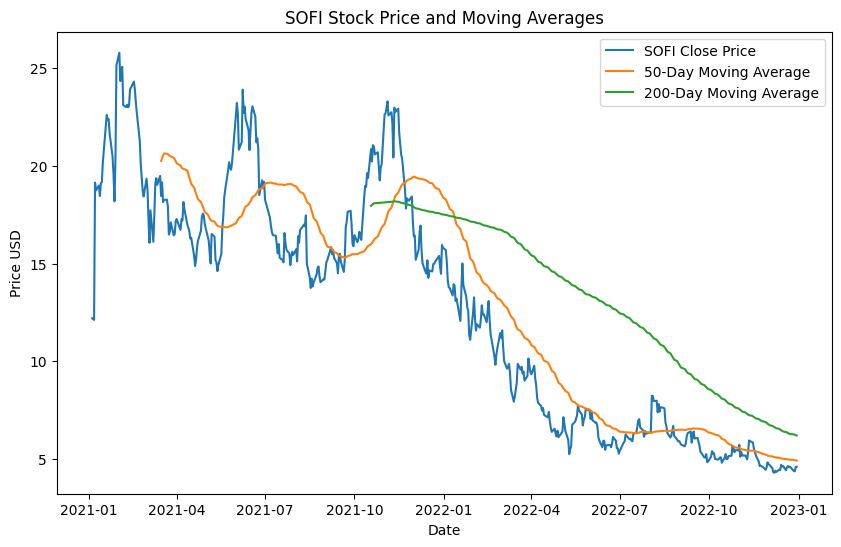

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(tickerDf['Close'], label='SOFI Close Price')
plt.plot(tickerDf['MA50'], label='50-Day Moving Average')
plt.plot(tickerDf['MA200'], label='200-Day Moving Average')
plt.title('SOFI Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.legend()
plt.show()

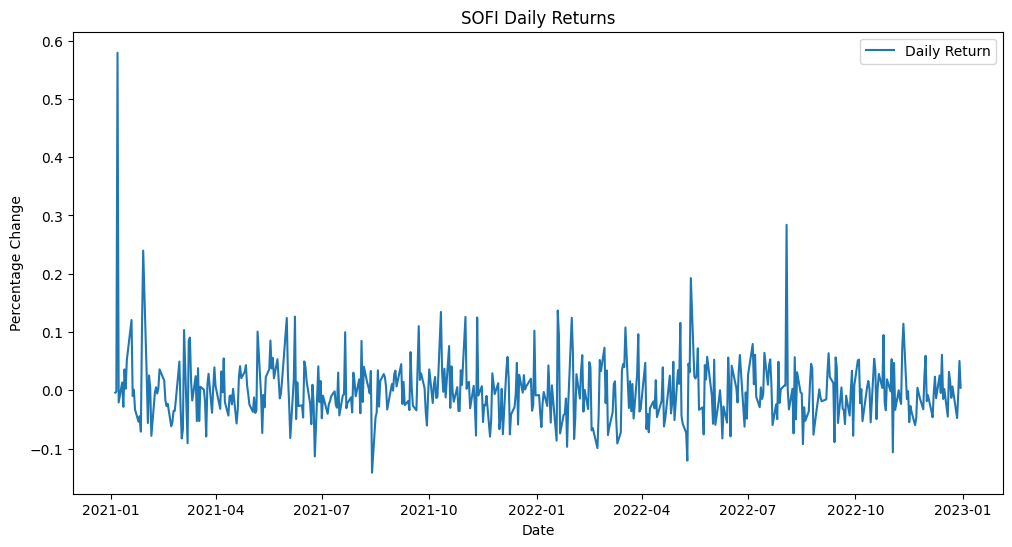

In [18]:
# daily returns
tickerDf['Daily Return'] = tickerDf['Close'].pct_change()

# volatility plot
plt.figure(figsize=(12,6))
plt.plot(tickerDf['Daily Return'], label='Daily Return')
plt.title('SOFI Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


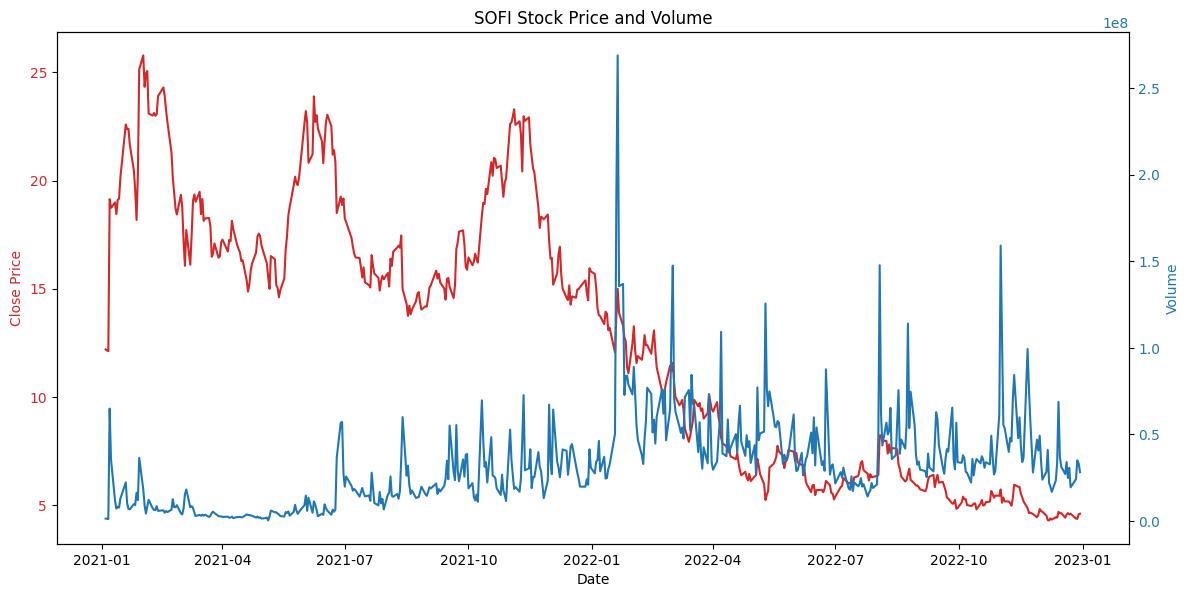

In [19]:
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(tickerDf['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(tickerDf['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('SOFI Stock Price and Volume')
plt.show()


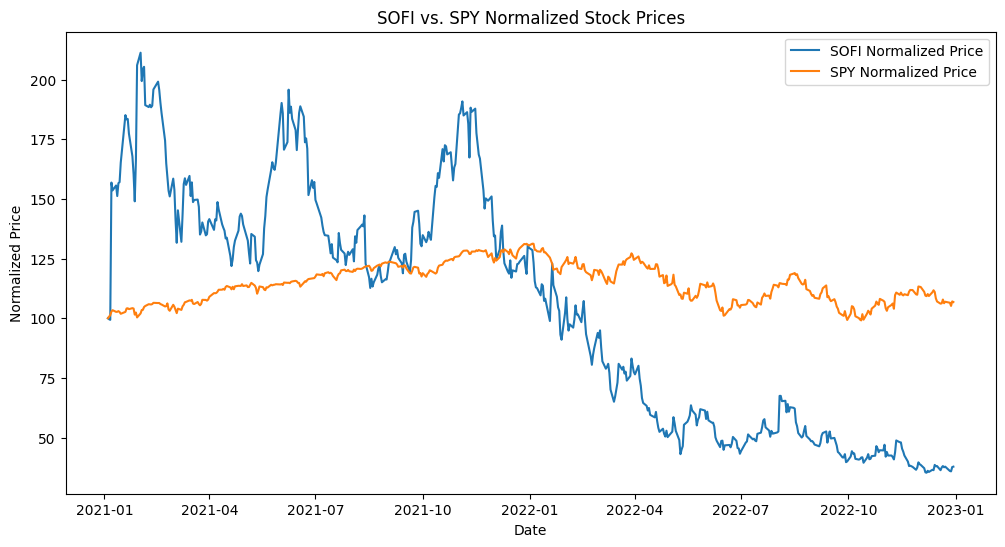

In [21]:
# S&P 500 ETF (SPY) comparison
spyData = yf.Ticker("SPY")
spyDf = spyData.history(period='1d', start='2021-1-1', end='2023-1-1')

# normalize data
tickerDf['Normalized'] = (tickerDf['Close'] / tickerDf['Close'].iloc[0]) * 100
spyDf['Normalized'] = (spyDf['Close'] / spyDf['Close'].iloc[0]) * 100

plt.figure(figsize=(12,6))
plt.plot(tickerDf['Normalized'], label='SOFI Normalized Price')
plt.plot(spyDf['Normalized'], label='SPY Normalized Price')
plt.title('SOFI vs. SPY Normalized Stock Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()
